In [18]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import laueutils
Import the package if its installed or specify its path

In [19]:
import numpy as np
import sys
from pathlib import Path

try:
    from laueutils.classes import FitFile
except ImportError:
    # Add the abspath to 2 directories up
    sys.path.append(str(Path.cwd().parents[1]))
    from laueutils.classes import FitFile

In [20]:
ff = FitFile("old_fitfile.fit")

# What's inside the class?
## Attributes

In [21]:
print(f"{' Attributes and their types ':=^70}")
for key, value in ff.__dict__.items():
    print(f"{key: <31}: {type(value)}")
print("="*70)

===================== Attributes and their types =====================
filename                       : <class 'str'>
corfile                        : <class 'str'>
timestamp                      : <class 'str'>
software                       : <class 'str'>
number_indexed_spots           : <class 'int'>
element                        : <class 'str'>
grain_index                    : <class 'str'>
mean_pixel_deviation           : <class 'float'>
peaklist                       : <class 'pandas.core.frame.DataFrame'>
UB                             : <class 'numpy.ndarray'>
B0                             : <class 'numpy.ndarray'>
UBB0                           : <class 'numpy.ndarray'>
euler_angles                   : <class 'numpy.ndarray'>
deviatoric_strain_crystal_frame: <class 'numpy.ndarray'>
deviatoric_strain_sample_frame : <class 'numpy.ndarray'>
new_lattice_parameters         : <class 'numpy.ndarray'>
CCDdict                        : <class 'dict'>
astar_prime                    : 

## Methods
### Print core info inside the fit file

In [22]:
ff.info

fitfile location "old_fitfile.fit"
Peaks data comes from the corfile "/gpfs/jazzy/data/bm32/inhouse/STAFF/SERGIOB/20240702 - ihma513 (SiC)/sample1_tip/corfiles/img_0010.cor"
Created Mon Sep  2 14:51:39 2024
Software used indexingSpotsSet.py

Material: 4H-SiC
Number of indexed spots: 189
Mean pixel deviation: 0.184

== New lattice parameters ==
a':   3.0730000
b':   3.0728924
c':  10.0609760
α':  90.0169063
β':  90.0241792
γ': 120.0090952

== Calibration parameters ==
distance:   77.98 [mm]
x_center: 1039.97 [px]
y_center: 1126.52 [px]
    beta:    0.43 [deg]
   gamma:    0.33 [deg]



### Accessing the peaks data

In [23]:
# DataFrame with all peak properties
ff.peaklist

,Intensity,h,k,l,2θexp,χexp,Xexp,Yexp,Energy,grain idx,pixel dev
0,59471.95,0,0,6,85.782562,0.864655,1023.54,1196.71,5.431198,0,0.058722
1,48112.37,-1,0,11,51.687898,-9.335084,1208.74,1965.07,16.43475,0,0.316031
2,47630.98,-1,1,10,78.634114,-26.32545,1563.42,1359.39,10.395528,0,0.159258
3,43500.69,0,-1,11,52.043918,11.509211,820.14,1957.96,16.329344,0,0.237757
4,40547.98,1,-1,10,79.534945,28.253963,468.69,1337.64,10.296227,0,0.114336
...,...,...,...,...,...,...,...,...,...,...,...
184,267.78,-1,3,25,107.720489,-27.891464,1606.09,736.58,20.543557,0,0.325473
185,266.87,-1,0,23,69.219875,-4.664618,1124.13,1522.33,25.281077,0,0.127513
186,263.55,2,-3,17,55.95676,33.855889,326.7,1973.48,25.901613,0,0.675692
187,258.45,3,-2,20,92.049899,38.173106,204.78,1065.29,19.145093,0,0.173373


In [24]:
# A shorter version of the full DataFrame
ff.peak_info

,h,k,l,Xexp,Yexp,2θexp,χexp,Intensity
0,0,0,6,1023.54,1196.71,85.782562,0.864655,59471.95
1,-1,0,11,1208.74,1965.07,51.687898,-9.335084,48112.37
2,-1,1,10,1563.42,1359.39,78.634114,-26.32545,47630.98
3,0,-1,11,820.14,1957.96,52.043918,11.509211,43500.69
4,1,-1,10,468.69,1337.64,79.534945,28.253963,40547.98
...,...,...,...,...,...,...,...,...
184,-1,3,25,1606.09,736.58,107.720489,-27.891464,267.78
185,-1,0,23,1124.13,1522.33,69.219875,-4.664618,266.87
186,2,-3,17,326.7,1973.48,55.95676,33.855889,263.55
187,3,-2,20,204.78,1065.29,92.049899,38.173106,258.45


In [25]:
# Just the peak positions
ff.peak_positions

,Xexp,Yexp
0,1023.54,1196.71
1,1208.74,1965.07
2,1563.42,1359.39
3,820.14,1957.96
4,468.69,1337.64
...,...,...
184,1606.09,736.58
185,1124.13,1522.33
186,326.7,1973.48
187,204.78,1065.29


### Plotting the peaks
Use pandas method to plot

<AxesSubplot: xlabel='Xexp', ylabel='Yexp'>

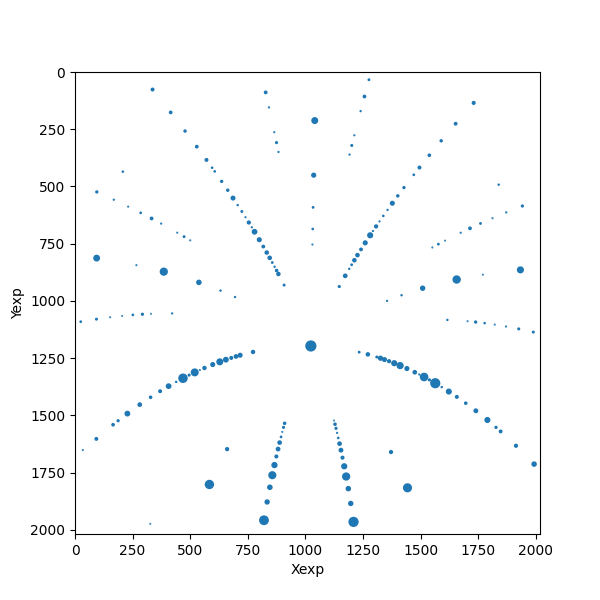

In [26]:
ff.peaklist.plot.scatter("Xexp", "Yexp", 
                         s=ff.peaklist.Intensity.values.astype(float)/ff.peaklist.Intensity.values.max()*50, 
                         ylim=(2018,0), xlim=(0,2018),
                         figsize=(6,6))

<AxesSubplot: xlabel='2θexp', ylabel='χexp'>

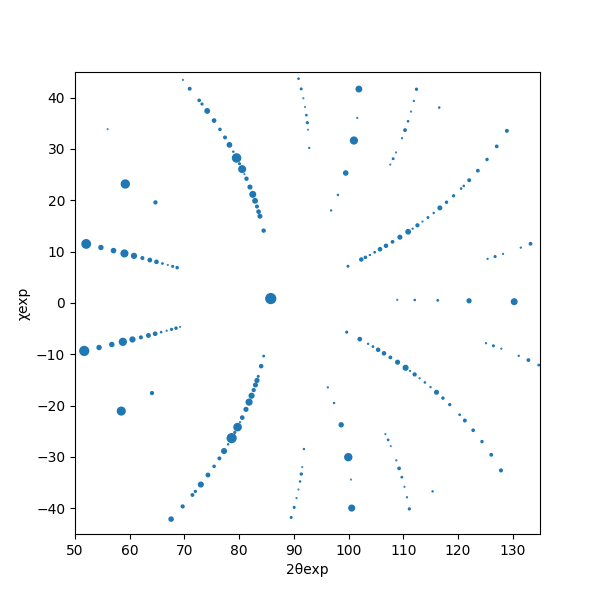

In [27]:
ff.peaklist.plot.scatter("2θexp", "χexp", 
                         s=ff.peaklist.Intensity.values.astype(float)/ff.peaklist.Intensity.values.max()*50,
                         xlim=(50, 135), ylim=(-45, 45),
                         figsize=(6,6))

See interactively the indexed pattern with the FitFile plot method

In [28]:
ff.plot()

FigureWidget({
    'data': [{'customdata': array([[1023.54, 1196.71, 0, ..., 59471.95, 5.431198, 0],
                                   [1208.74, 1965.07, -1, ..., 48112.37, 16.43475, 1],
                                   [1563.42, 1359.39, -1, ..., 47630.98, 10.395528, 2],
                                   ...,
                                   [326.7, 1973.48, 2, ..., 263.55, 25.901613, 186],
                                   [204.78, 1065.29, 3, ..., 258.45, 19.145093, 187],
                                   [329.74, 1056.07, 3, ..., 250.8, 21.372339, 188]], dtype=object),
              'hovertemplate': ('(%{customdata[0]}, %{customdat' ... '>spot index = %{customdata[7]}'),
              'mode': 'markers',
              'name': 'Experimental',
              'type': 'scatter',
              'uid': 'fdbbfd65-2561-4227-832a-d5113f90da7a',
              'x': {'bdata': ('uB6F61H8j0ApXI/C9eKSQEjhehSubZ' ... 'MzMzNrdEApXI/C9ZhpQKRwPQrXm3RA'),
                    'dtype': 'f8'},
     

## Some cool operations you can do
If you are interested in reflections with given properties, for example specific [h, k, l], you can query the dataframe

In [29]:
ff.peaklist.query("(h == 1 or h == 0 or h == -1) and k == 0")

,Intensity,h,k,l,2θexp,χexp,Xexp,Yexp,Energy,grain idx,pixel dev
0,59471.95,0,0,6,85.782562,0.864655,1023.54,1196.71,5.431198,0,0.058722
1,48112.37,-1,0,11,51.687898,-9.335084,1208.74,1965.07,16.43475,0,0.316031
9,28951.78,-1,0,14,58.743322,-7.564889,1176.73,1766.84,18.2122,0,0.159504
19,14240.9,-1,0,15,60.505013,-7.104501,1168.39,1722.28,18.913941,0,0.155715
26,11677.87,1,0,14,110.895354,13.875478,779.21,697.93,10.849495,0,0.064644
31,10238.75,-1,0,13,56.728601,-8.085085,1186.15,1819.98,17.553525,0,0.238199
32,9977.19,-1,0,12,54.401686,-8.670549,1196.74,1884.61,16.953207,0,0.291595
40,8340.07,1,0,15,109.389237,12.823884,799.73,732.56,11.679943,0,0.154011
44,7965.65,1,0,11,116.696639,18.526399,685.82,550.69,8.419799,0,0.154793
45,7492.89,-1,0,17,63.424612,-6.320058,1154.17,1651.85,20.408192,0,0.174158


In [30]:
ff.peaklist.query("h == k")

,Intensity,h,k,l,2θexp,χexp,Xexp,Yexp,Energy,grain idx,pixel dev
0,59471.95,0,0,6,85.782562,0.864655,1023.54,1196.71,5.431198,0,0.058722
16,19170.1,1,1,16,130.284118,0.255401,1040.47,212.14,11.741627,0,0.036254
35,8986.5,1,1,20,122.030339,0.426859,1035.91,450.6,14.82496,0,0.0933
124,1172.48,1,1,24,116.298854,0.523403,1033.31,591.38,18.046752,0,0.091516
135,936.76,1,1,28,112.101155,0.586494,1031.6,685.64,21.359606,0,0.100976
172,350.23,1,1,32,108.908831,0.625448,1030.49,753.52,24.735541,0,0.14128


### Let's plot only the peaks that meet a condition!
When we call the plot method of the FitFile class we call the function ```indexation_plot``` under the hood. Since this function takes as an input a pandas DataFrame containing the data from a fit file, we can directly call it and pass a filtered dataframe according to our criteria. In this way we see which peaks in the diffraction pattern meet them

In [31]:
from laueutils.visualization.indexation import indexation_plot

In [32]:
indexation_plot(ff.peaklist.query("(h == 1 or h == 0 or h == -1) and k == 0"))

FigureWidget({
    'data': [{'customdata': array([[1023.54, 1196.71, 0, ..., 59471.95, 5.431198, 0],
                                   [1208.74, 1965.07, -1, ..., 48112.37, 16.43475, 1],
                                   [1176.73, 1766.84, -1, ..., 28951.78, 18.2122, 9],
                                   ...,
                                   [866.21, 850.64, 1, ..., 601.73, 15.927401, 147],
                                   [1137.4, 1576.14, -1, ..., 449.54, 22.793721, 160],
                                   [1124.13, 1522.33, -1, ..., 266.87, 25.281077, 185]], dtype=object),
              'hovertemplate': ('(%{customdata[0]}, %{customdat' ... '>spot index = %{customdata[7]}'),
              'mode': 'markers',
              'name': 'Experimental',
              'type': 'scatter',
              'uid': '08e92144-5710-40e1-98aa-a9ce39932924',
              'x': {'bdata': ('uB6F61H8j0ApXI/C9eKSQFK4HoXrYp' ... 'oUrhGLQJqZmZmZxZFA7FG4HoWQkUA='),
                    'dtype': 'f8'},
   

In [33]:
indexation_plot(ff.peaklist.query("h == k"))

FigureWidget({
    'data': [{'customdata': array([[1023.54, 1196.71, 0, 0, 6, 59471.95, 5.431198, 0],
                                   [1040.47, 212.14, 1, 1, 16, 19170.1, 11.741627, 16],
                                   [1035.91, 450.6, 1, 1, 20, 8986.5, 14.82496, 35],
                                   [1033.31, 591.38, 1, 1, 24, 1172.48, 18.046752, 124],
                                   [1031.6, 685.64, 1, 1, 28, 936.76, 21.359606, 135],
                                   [1030.49, 753.52, 1, 1, 32, 350.23, 24.735541, 172]], dtype=object),
              'hovertemplate': ('(%{customdata[0]}, %{customdat' ... '>spot index = %{customdata[7]}'),
              'mode': 'markers',
              'name': 'Experimental',
              'type': 'scatter',
              'uid': 'e3b8abfc-3c12-4699-b20a-9353e4af6d6d',
              'x': {'bdata': 'uB6F61H8j0B7FK5H4UGQQHE9CtejL5BACtejcD0lkEBmZmZmZh6QQClcj8L1GZBA', 'dtype': 'f8'},
              'y': {'bdata': 'pHA9CteykkAUrkfheoRqQJqZmZmZKXxA1